In [1]:
cd ..

/home/cc/Gloss/Spoter-SL


In [2]:
from torchvision import transforms
from Src.datasets.Spoter_dataloader import LSP_Dataset
from torch.utils.data import DataLoader
from Src.datasets.Spoter_dataloader_aug import AugmentedDataLoader
from Src.spoter.gaussian_noise import GaussianNoise

In [3]:
import random
import numpy as np
import torch
import os

In [4]:
seed = 379

gaussian_mean = 0
gaussian_std = 0.1
augmentation = True

factor_aug = 2
training_set_path   = "../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Train.hdf5"
validation_set_path= "../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Val.hdf5"

In [5]:
# Initialize all the random seeds
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
g = torch.Generator()
g.manual_seed(seed)

In [6]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")

In [7]:
transform = transforms.Compose([GaussianNoise(gaussian_mean, gaussian_std)])

In [8]:

if augmentation:
    train_set = LSP_Dataset(training_set_path, transform=transform, have_aumentation=False,has_normalization=False, keypoints_model='mediapipe',factor=factor_aug)
else:
    train_set = LSP_Dataset(training_set_path, transform=transform, have_aumentation=True, has_normalization=True,keypoints_model='mediapipe')


********************
********************
********************
Use keypoint model :  mediapipe
self.list_labels_banned []
path                       : ../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Train.hdf5
keypoints_model            : mediapipe
landmarks_ref              : Data/Mapeo landmarks librerias.csv
threshold_frecuency_labels : 0
list_labels_banned         : []
Use keypoint model :  mediapipe
use column for index keypoint : mp_indexInArray
 using keypoints_number: 54
section_keypoints :  54  -- uniques:  54
name_keypoints    :  54  -- uniques:  33
idx_keypoints     :  54  -- uniques:  54

section_keypoints used:
['pose_nose' 'pose_left_eye' 'pose_right_eye' 'pose_left_ear'
 'pose_right_ear' 'pose_left_shoulder' 'pose_right_shoulder'
 'pose_left_elbow' 'pose_right_elbow' 'pose_left_wrist' 'pose_right_wrist'
 'leftHand_wrist' 'leftHand_thumb_cmc' 'leftHand_thumb_mcp'
 'leftHand_thumb_ip' 'leftHand_thumb_tip' 'leftHand_index_finger_m

 19%|█████████████████████████▉                                                                                                                  | 138/744 [00:00<00:00, 1364.83it/s]

original size video :  (19, 544, 2) -- label :  ESPERAR
filtering by keypoints idx .. 
filtered size video :  (19, 54, 2) -- label :  ESPERAR


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 744/744 [00:00<00:00, 1398.63it/s]


frecuency labels filtering ...
hist counter
{'ESPERAR': 15, 'OYE': 14, 'VER': 36, 'YO': 36, 'DINERO': 12, 'CUANTO': 13, 'DENTRO': 16, 'UNO': 25, 'CAMINAR-PERSONA': 21, 'MI': 16, 'IDEA': 14, 'IGUAL': 29, 'HOY': 14, 'NIÑO': 17, 'DORMIR': 16, 'AHORA': 20, 'YA': 20, 'SOL': 11, 'DOS': 33, 'GUARDAR': 14, 'BIEN': 36, 'AMIGO': 13, 'DECIR': 27, 'IR': 22, 'HACER': 16, 'HOLA': 9, 'ESCRIBIR': 12, 'SENTIR': 12, 'PENSAR': 29, 'COMPRAR': 13, 'NO': 32, 'CASA': 13, 'CIEN': 28, 'SABER': 12, 'COMER': 36, 'AYUDAR': 12, 'QUÉ': 13, 'TRES': 17}
sorted(set(labels_dataset))  :  ['AHORA', 'AMIGO', 'AYUDAR', 'BIEN', 'CAMINAR-PERSONA', 'CASA', 'CIEN', 'COMER', 'COMPRAR', 'CUANTO', 'DECIR', 'DENTRO', 'DINERO', 'DORMIR', 'DOS', 'ESCRIBIR', 'ESPERAR', 'GUARDAR', 'HACER', 'HOLA', 'HOY', 'IDEA', 'IGUAL', 'IR', 'MI', 'NIÑO', 'NO', 'OYE', 'PENSAR', 'QUÉ', 'SABER', 'SENTIR', 'SOL', 'TRES', 'UNO', 'VER', 'YA', 'YO']
dict_labels_dataset      : {'AHORA': 0, 'AMIGO': 1, 'AYUDAR': 2, 'BIEN': 3, 'CAMINAR-PERSONA': 4, 'CASA': 5

In [9]:
val_set = LSP_Dataset(validation_set_path, keypoints_model='mediapipe', have_aumentation=False,has_normalization=True)
val_loader = DataLoader(val_set, shuffle=True, generator=g)

********************
********************
********************
Use keypoint model :  mediapipe
self.list_labels_banned []
path                       : ../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Val.hdf5
keypoints_model            : mediapipe
landmarks_ref              : Data/Mapeo landmarks librerias.csv
threshold_frecuency_labels : 0
list_labels_banned         : []
Use keypoint model :  mediapipe
use column for index keypoint : mp_indexInArray
 using keypoints_number: 54
section_keypoints :  54  -- uniques:  54
name_keypoints    :  54  -- uniques:  33
idx_keypoints     :  54  -- uniques:  54

section_keypoints used:
['pose_nose' 'pose_left_eye' 'pose_right_eye' 'pose_left_ear'
 'pose_right_ear' 'pose_left_shoulder' 'pose_right_shoulder'
 'pose_left_elbow' 'pose_right_elbow' 'pose_left_wrist' 'pose_right_wrist'
 'leftHand_wrist' 'leftHand_thumb_cmc' 'leftHand_thumb_mcp'
 'leftHand_thumb_ip' 'leftHand_thumb_tip' 'leftHand_index_finger_mcp

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 1366.69it/s]

original size video :  (27, 544, 2) -- label :  DOS
filtering by keypoints idx .. 
filtered size video :  (27, 54, 2) -- label :  DOS
frecuency labels filtering ...
hist counter
{'DOS': 9, 'COMPRAR': 3, 'UNO': 6, 'IGUAL': 7, 'COMER': 9, 'HACER': 4, 'CIEN': 7, 'DENTRO': 4, 'BIEN': 9, 'IDEA': 4, 'CASA': 3, 'PENSAR': 8, 'NIÑO': 4, 'AYUDAR': 4, 'GUARDAR': 3, 'NO': 7, 'HOLA': 3, 'DECIR': 7, 'DORMIR': 5, 'AMIGO': 3, 'YO': 9, 'SENTIR': 3, 'TRES': 5, 'CAMINAR-PERSONA': 6, 'ESCRIBIR': 3, 'YA': 5, 'QUÉ': 3, 'AHORA': 5, 'MI': 4, 'SOL': 2, 'SABER': 2, 'OYE': 3, 'VER': 9, 'DINERO': 3, 'HOY': 4, 'IR': 5, 'ESPERAR': 4, 'CUANTO': 3}


sorted(set(labels_dataset))  :  ['AHORA', 'AMIGO', 'AYUDAR', 'BIEN', 'CAMINAR-PERSONA', 'CASA', 'CIEN', 'COMER', 'COMPRAR', 'CUANTO', 'DECIR', 'DENTRO', 'DINERO', 'DORMIR', 'DOS', 'ESCRIBIR', 'ESPERAR', 'GUARDAR', 'HACER', 'HOLA', 'HOY', 'IDEA', 'IGUAL', 'IR', 'MI', 'NIÑO', 'NO', 'OYE', 'PENSAR', 'QUÉ', 'SABER', 'SENTIR', 'SOL', 'TRES', 'UNO', 'VER', 'YA', 'YO']
dict_labels_dataset      : {'AHORA': 0, 'AMIGO': 1, 'AYUDAR': 2, 'BIEN': 3, 'CAMINAR-PERSONA': 4, 'CASA': 5, 'CIEN': 6, 'COMER': 7, 'COMPRAR': 8, 'CUANTO': 9, 'DECIR': 10, 'DENTRO': 11, 'DINERO': 12, 'DORMIR': 13, 'DOS': 14, 'ESCRIBIR': 15, 'ESPERAR': 16, 'GUARDAR': 17, 'HACER': 18, 'HOLA': 19, 'HOY': 20, 'IDEA': 21, 'IGUAL': 22, 'IR': 23, 'MI': 24, 'NIÑO': 25, 'NO': 26, 'OYE': 27, 'PENSAR': 28, 'QUÉ': 29, 'SABER': 30, 'SENTIR': 31, 'SOL': 32, 'TRES': 33, 'UNO': 34, 'VER': 35, 'YA': 36, 'YO': 37}
inv_dict_labels_dataset  : {0: 'AHORA', 1: 'AMIGO', 2: 'AYUDAR', 3: 'BIEN', 4: 'CAMINAR-PERSONA', 5: 'CASA', 6: 'CIEN', 7: 'COMER', 8

In [10]:

if augmentation:
    train_loader = AugmentedDataLoader(train_set, shuffle=True, generator=g)
else:
    train_loader = DataLoader(train_set, shuffle=True, generator=g)

In [11]:
train_loader

In [12]:
val_loader

In [13]:
idx = 0
depth_map  = train_loader.dataset.data[0]
label      = train_loader.dataset.labels[0]
video_name = train_loader.dataset.video_name[0].decode('utf-8')
print(f"video_name : {video_name}")
print(f"label      : {label}")
print(f"depth_map  : {depth_map.shape}")

video_name : Videos/SEGMENTED_SIGN/ESPERAR_ORACION_2/ESPERAR_2_5.mp4
label      : 16
depth_map  : (19, 54, 2)


In [14]:
import cv2
import matplotlib.pyplot as plt
def prepare_only_keypoints_image(keypoints):

    # DRAW POINTS
    img = np.zeros((256, 256, 3), np.uint8)

    for n, coords in enumerate(keypoints):

        cor_x = int(coords[0] * 256)
        cor_y = int(coords[1] * 256)

        img = cv2.circle(img, (cor_x, cor_y), 1, (0, 255, 255), -1)
    plt.imshow(img)
    plt.show()

In [15]:
depth_map[0].shape

(54, 2)

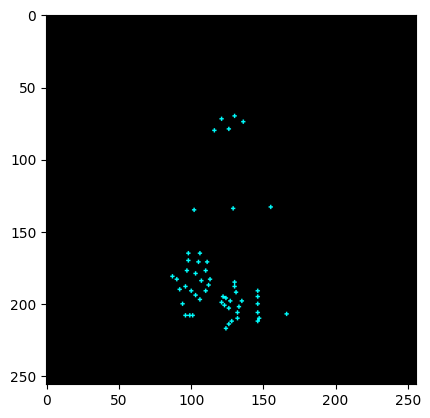

In [16]:
prepare_only_keypoints_image(depth_map[0])

In [50]:
import numpy as np
import pandas as pd
import cv2

# I LEFT SOME COMMENTS AT THE END OF THE FILE

# Show just points
def prepare_keypoints_image(keypoints):
    
    # DRAW POINTS
    img = np.zeros((256, 256, 3), np.uint8)

    for n, coords in enumerate(keypoints):

        cor_x = int(coords[0] * 256)
        cor_y = int(coords[1] * 256)

        cv2.circle(img, (cor_x, cor_y), 1, (0, 0, 255), -1)

    #cv2.imwrite(f'foo.jpg', img)
    return img

# Shows points with connections
def prepare_keypoints_image(keypoints, connections=[], pos_rel='', addText=None):
    # This variable is used to draw points conections
    
    part_line = {}

    # DRAW POINTS
    img= np.zeros((256, 256, 3), np.uint8)

    # To print numbers
    fontScale = 0.5
    color = (0, 255, 0)
    thickness = 1

    org = (220, 20)
    img = cv2.putText(img, str(pos_rel), org, cv2.FONT_HERSHEY_SIMPLEX, 
                          fontScale, color, thickness, cv2.LINE_AA)

    # To print the text
    if addText:
        org = (20, 20)
        img = cv2.putText(img, addText, org, cv2.FONT_HERSHEY_SIMPLEX, 
                          fontScale, color, thickness, cv2.LINE_AA)


    for n, coords in enumerate(keypoints):

        cor_x = int(coords[0] * 256)
        cor_y = int(coords[1] * 256)
        #cv2.circle(img, (cor_x, cor_y), 2, (0, 0, 255), -1)
        part_line[n] = (cor_x, cor_y)

    # DRAW JOINT LINES
    for start_p, end_p in connections:
        if start_p in part_line and end_p in part_line:
            #s_type, e_type = part_type[start_p], part_type[end_p]
            start_p = part_line[start_p]
            end_p = part_line[end_p]
            cv2.line(img, start_p, end_p, (255,100,100), 2)
            cv2.circle(img, start_p, 1, (255, 255, 255), -1)
            cv2.circle(img, end_p, 1, (255, 255, 255), -1)

    #cv2.imwrite(f'foo.jpg', img)
    return img


def get_edges_index(path_points= './points_54.csv'):
    
    points_joints_info = pd.read_csv(path_points)
    # we subtract one because the list is one start (we wanted it to start in zero)
    ori = points_joints_info.origin-1
    tar = points_joints_info.tarjet-1

    ori = np.array(ori)
    tar = np.array(tar)

    return np.array([ori,tar])


# THIS IS A SAMPLE TO USE THESE FUNCTIONS

# Example Usage:
#
# connections = np.moveaxis(np.array(get_edges_index('54')), 0, 1)
# kp_frame = data[instance_pos][frame_pos]
# prepare_keypoints_image(kp_frame, connections, -1, "pose")

# ADDITIONAL COMMENTS
#
# Locate the "points_54.csv" file in the same folder as this script.
#
# These functions are used to draw the keypoints of just one frame.
# If the data doesn't work, try using np.transpose(data, (0,2,1)) in the dataset.
# Then get one frame with kp_frame = data[instance_pos][frame_pos].

In [51]:
train_loader.dataset.df_keypoints.head(3)

,orden,Section,Key,Name,Selected 29,Selected 71,Selected 54,QualityComparison,mp_compare,mp_indexLibrary,mp_indexInArray,wp_compare,wp_indexLibrary,wp_indexInArray,op_compare,op_indexLibrary,op_indexInArray,New Array
0,1,pose,nose,pose_nose,x,x,x,x,NaN,0,0.0,NaN,1,0,NaN,0,0,1.0
2,1,pose,left_eye,pose_left_eye,x,x,x,x,NaN,2,2.0,NaN,2,1,3.0,16,16,2.0
5,1,pose,right_eye,pose_right_eye,x,x,x,x,NaN,5,5.0,NaN,3,2,4.0,15,15,3.0


In [52]:
print(train_loader.dataset.keypoint_body_part_index)

{'pose': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 53], 'left_hand': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'rigth_hand': [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]}


In [53]:
print(train_loader.dataset.body_section_dict)

{'pose_nose': 0, 'pose_left_eye': 1, 'pose_right_eye': 2, 'pose_left_ear': 3, 'pose_right_ear': 4, 'pose_left_shoulder': 5, 'pose_right_shoulder': 6, 'pose_left_elbow': 7, 'pose_right_elbow': 8, 'pose_left_wrist': 9, 'pose_right_wrist': 10, 'leftHand_wrist': 11, 'leftHand_thumb_cmc': 12, 'leftHand_thumb_mcp': 13, 'leftHand_thumb_ip': 14, 'leftHand_thumb_tip': 15, 'leftHand_index_finger_mcp': 16, 'leftHand_index_finger_pip': 17, 'leftHand_index_finger_dip': 18, 'leftHand_index_finger_tip': 19, 'leftHand_middle_finger_mcp': 20, 'leftHand_middle_finger_pip': 21, 'leftHand_middle_finger_dip': 22, 'leftHand_middle_finger_tip': 23, 'leftHand_ring_finger_mcp': 24, 'leftHand_ring_finger_pip': 25, 'leftHand_ring_finger_dip': 26, 'leftHand_ring_finger_tip': 27, 'leftHand_pinky_mcp': 28, 'leftHand_pinky_pip': 29, 'leftHand_pinky_dip': 30, 'leftHand_pinky_tip': 31, 'rightHand_wrist': 32, 'rightHand_thumb_cmc': 33, 'rightHand_thumb_mcp': 34, 'rightHand_thumb_ip': 35, 'rightHand_thumb_tip': 36, 'rig

In [54]:
connections = get_edges_index(path_points= '../SL_ConnectingPoints/dataCleaningFunctions/points_54.csv')
connections = np.moveaxis(np.array(connections), 0, 1)
connections[:3]

array([[53,  0],
       [ 0,  1],
       [ 0,  2]])

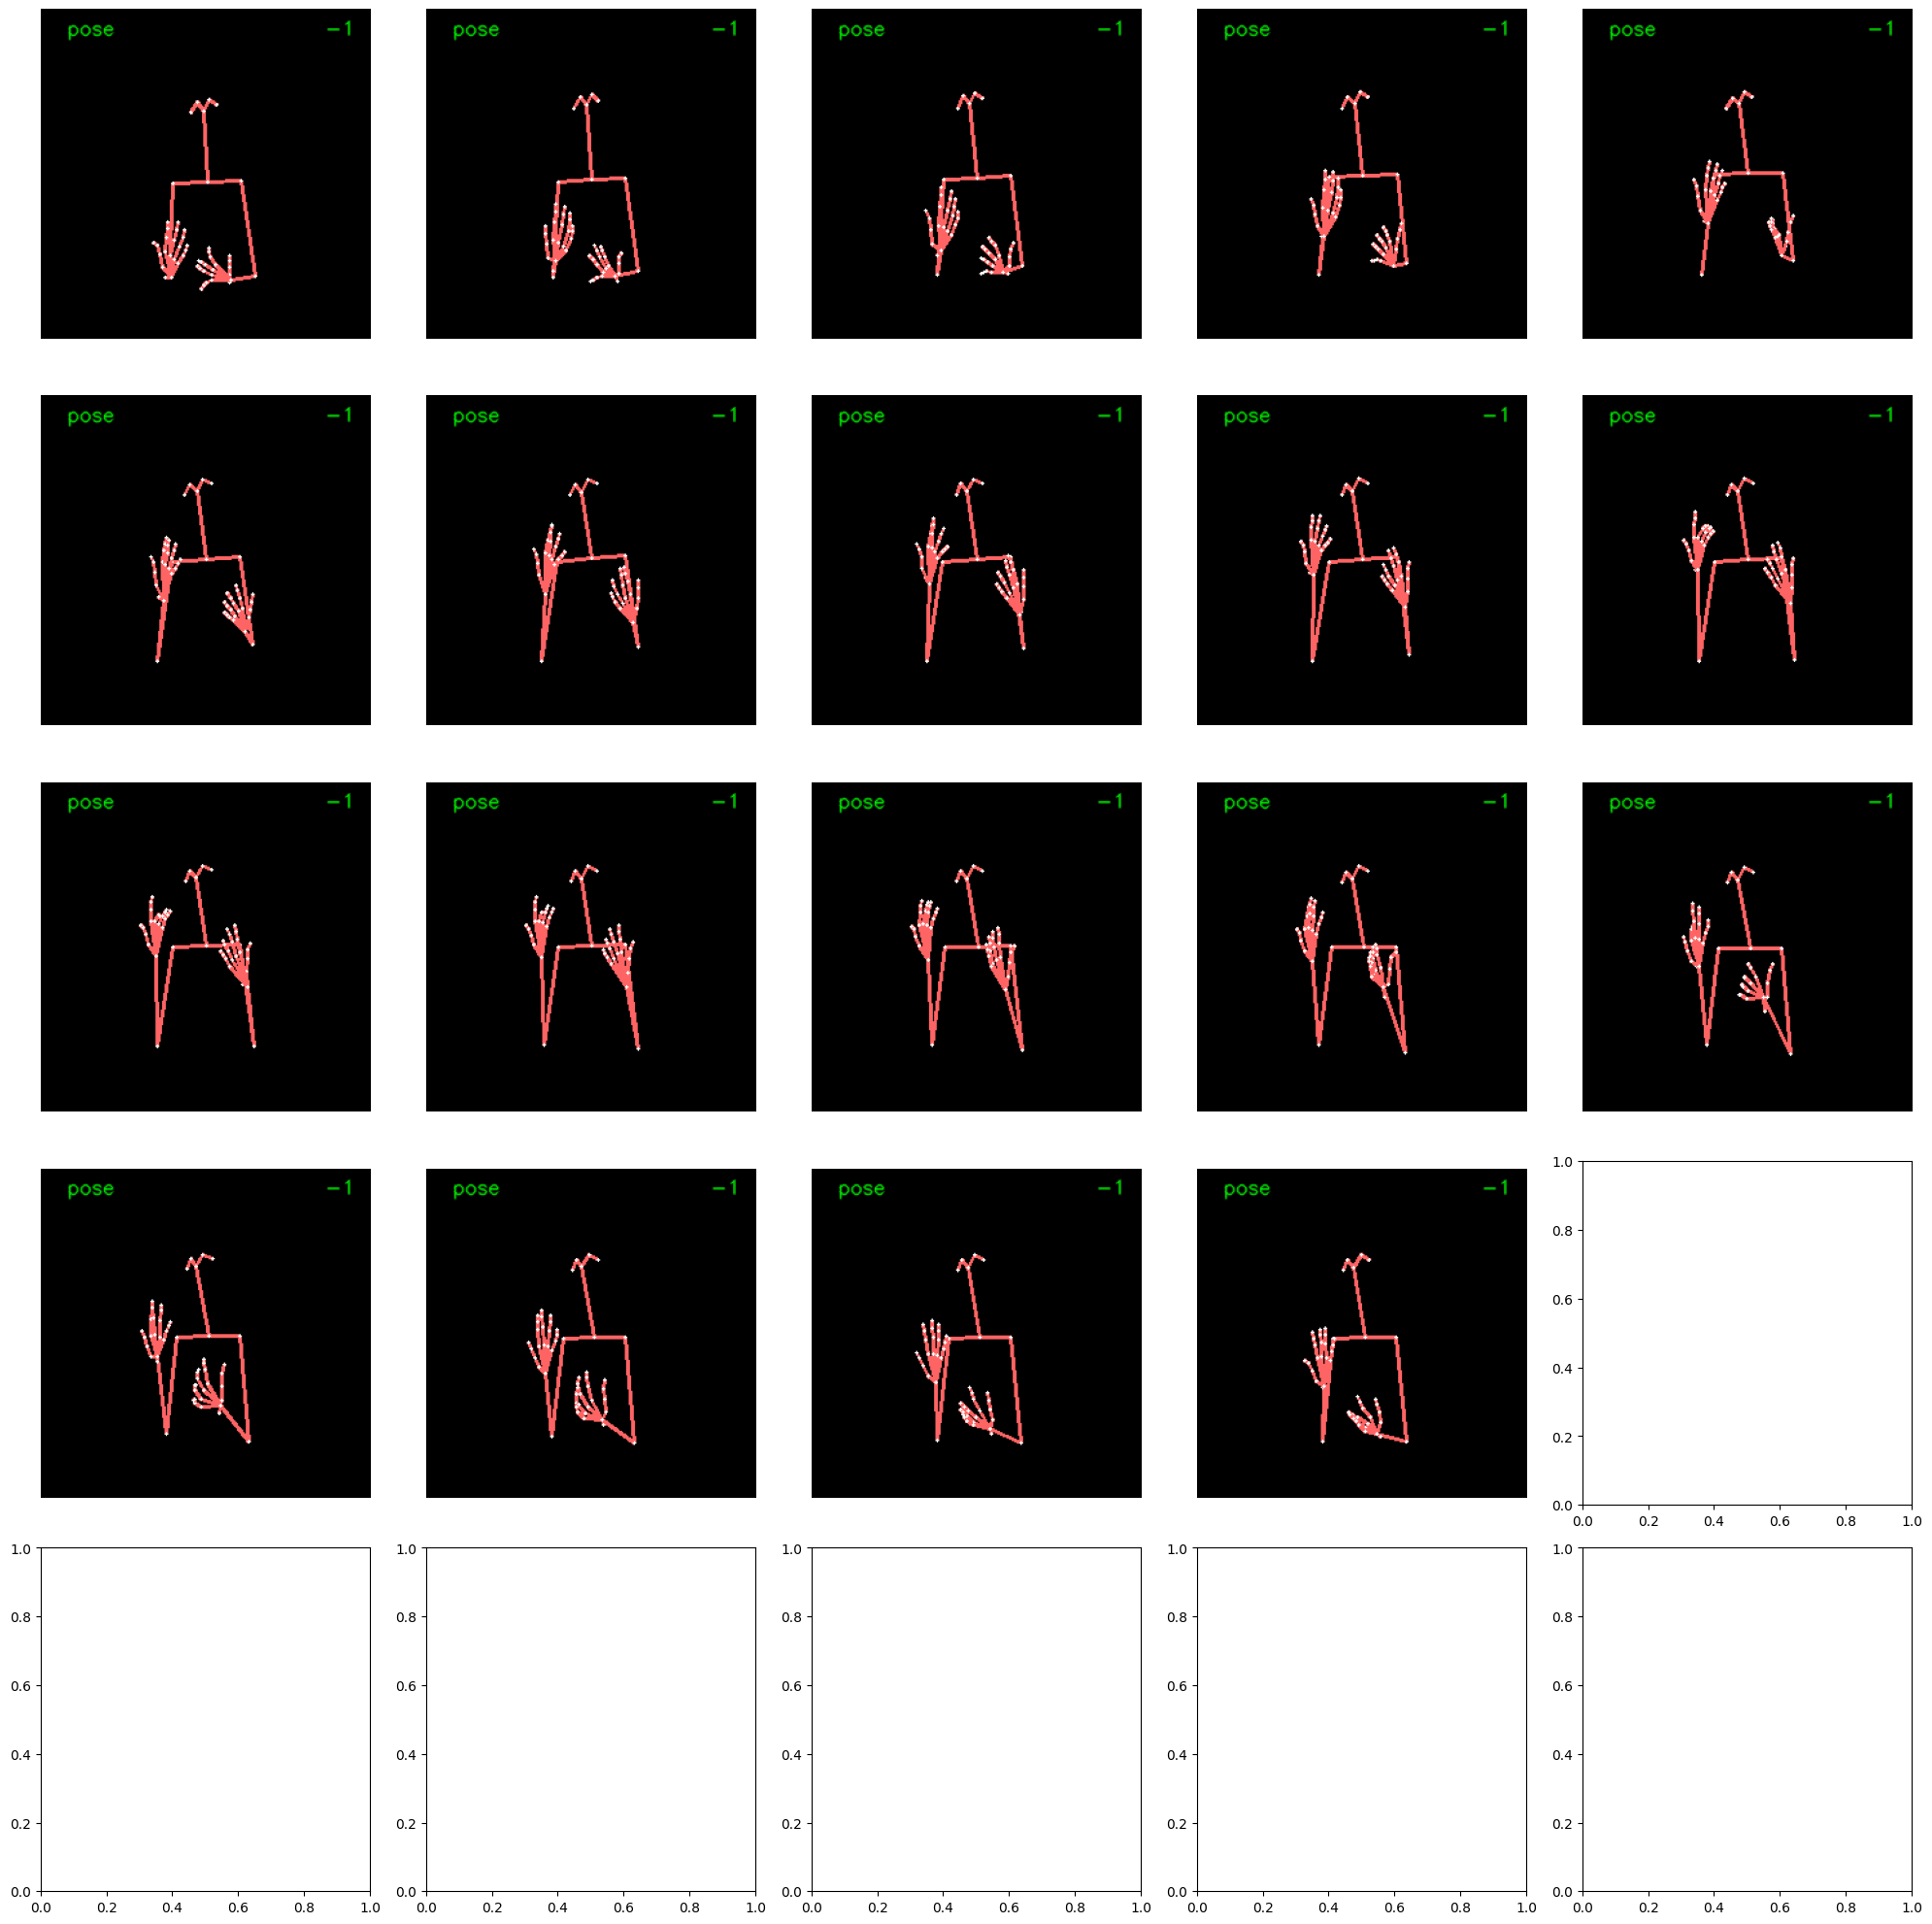

In [55]:
depth_map  = train_loader.dataset.data[0]

fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        try:
            kp_frame = depth_map[i*5 + j] 
            img = prepare_keypoints_image(kp_frame, connections, -1, "pose")
            
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
        except:
            pass
plt.tight_layout() 
plt.show()

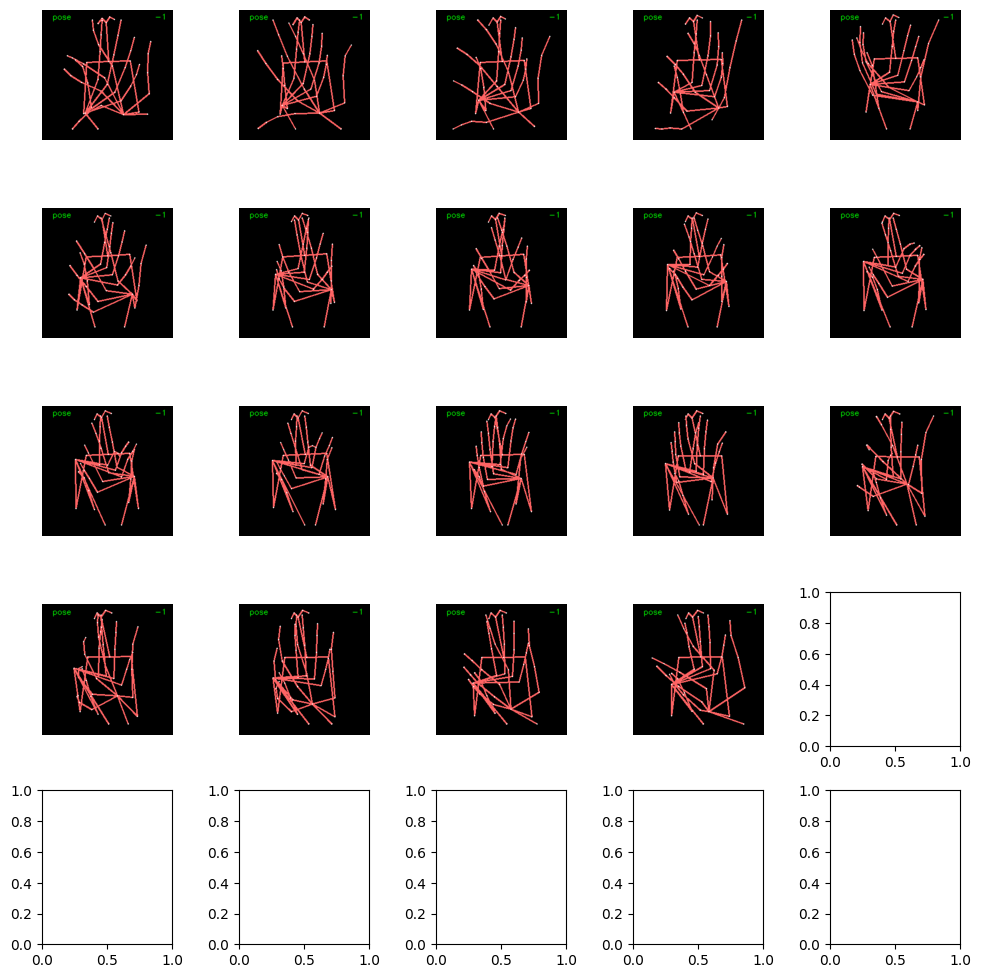

In [56]:
depth_map  = train_loader.dataset.data_normalized[0]

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        try:
            kp_frame = depth_map[i*5 + j] 
            img = prepare_keypoints_image(kp_frame, connections, -1, "pose")
            
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
        except:
            pass
plt.tight_layout() 
plt.show()

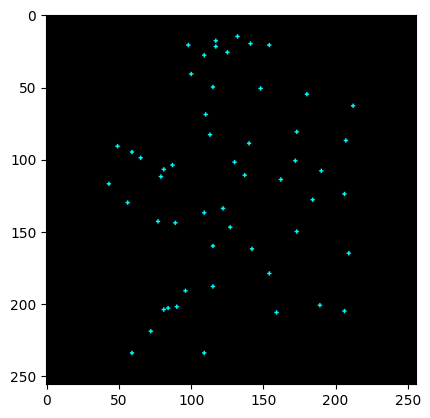

In [57]:
prepare_only_keypoints_image(depth_map[0])